In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [3]:
import ultralytics; print(ultralytics.__version__)

8.3.237



image 1/1 e:\AI\yolov11-face-demo\images\face3.jpg: 640x480 2 faces, 257.6ms
Speed: 6.8ms preprocess, 257.6ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 480)


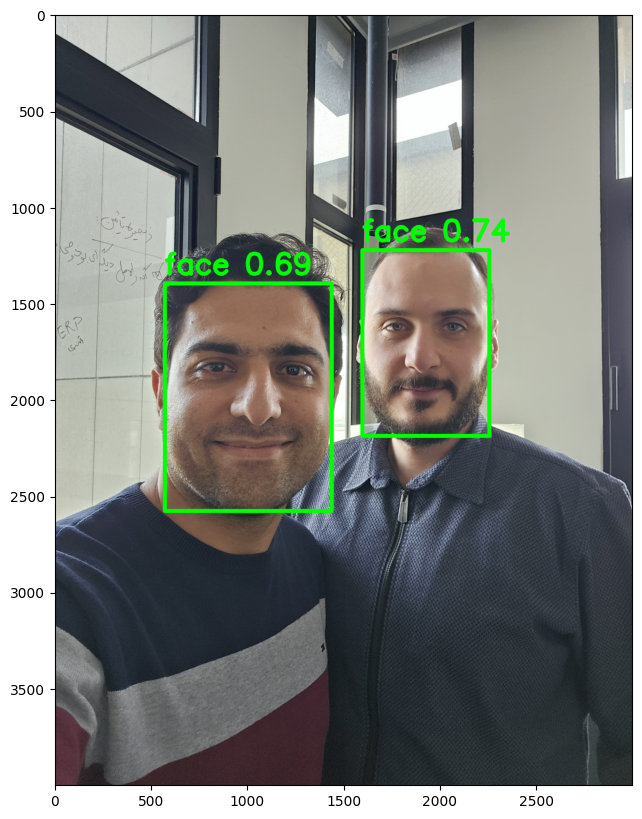

In [4]:
MODEL_PATH = "yolov8n-face.pt"   # downloaded model
IMAGE_PATH = "images/face3.jpg"
OUTPUT_PATH = "images/out_face.jpg"

# Load YOLO face model
model = YOLO(MODEL_PATH)

# Run prediction
results = model(IMAGE_PATH, imgsz=640, conf=0.25)

# Read image
img = cv2.imread(IMAGE_PATH)

# Draw detections
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
    conf = float(box.conf[0])
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 20)
    cv2.putText(img, f"face {conf:.2f}", (x1, y1 - 50),
                cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 20)


plt.figure(figsize=(20, 10))
plt.imshow(img[...,::-1])
plt.show()

#cv2.imwrite(OUTPUT_PATH, img)
#print("Saved:", OUTPUT_PATH)
